# Setup Working directory

In [6]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("../")

# Install Libraries and Download Dataset

In [ ]:
!pip install -q underthesea
!pip install -q kaggle

In [8]:
import os
import zipfile


os.makedirs("dataset", exist_ok=True)
os.makedirs("tokenizers", exist_ok=True)

!kaggle datasets download phmanhth/vietnamese-text-classification

with zipfile.ZipFile("vietnamese-text-classification.zip", 'r') as zip_ref:
     zip_ref.extractall("dataset")

Dataset URL: https://www.kaggle.com/datasets/phmanhth/vietnamese-text-classification
License(s): unknown




  0%|          | 0.00/45.7M [00:00<?, ?B/s]
  2%|▏         | 1.00M/45.7M [00:04<02:59, 261kB/s]
  4%|▍         | 2.00M/45.7M [00:08<03:11, 240kB/s]
  7%|▋         | 3.00M/45.7M [00:13<03:09, 236kB/s]
  9%|▉         | 4.00M/45.7M [00:15<02:29, 293kB/s]
 11%|█         | 5.00M/45.7M [00:17<02:04, 344kB/s]
 13%|█▎        | 6.00M/45.7M [00:19<01:45, 394kB/s]
 15%|█▌        | 7.00M/45.7M [00:21<01:36, 419kB/s]
 18%|█▊        | 8.00M/45.7M [00:23<01:29, 441kB/s]
 20%|█▉        | 9.00M/45.7M [00:25<01:23, 460kB/s]
 22%|██▏       | 10.0M/45.7M [00:28<01:22, 456kB/s]
 24%|██▍       | 11.0M/45.7M [00:30<01:21, 446kB/s]
 26%|██▋       | 12.0M/45.7M [00:33<01:20, 440kB/s]
 28%|██▊       | 13.0M/45.7M [00:35<01:15, 456kB/s]
 31%|███       | 14.0M/45.7M [00:37<01:13, 454kB/s]
 33%|███▎      | 15.0M/45.7M [00:40<01:19, 407kB/s]
 35%|███▌      | 16.0M/45.7M [00:43<01:22, 376kB/s]
 37%|███▋      | 17.0M/45.7M [00:46<01:19, 381kB/s]
 39%|███▉      | 18.0M/45.7M [00:49<01:13, 394kB/s]
 42%|████▏     | 19

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import savefig

from underthesea import word_tokenize

import pickle
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Processing Dataset

## Load Dataset

In [3]:
def load_data_from_folder(folder_path, label_column='label'):
    """Loads data from a folder of text files into a pandas DataFrame."""
    data = []
    for foldername in os.listdir(folder_path):
      for filename in os.listdir(os.path.join(folder_path, foldername)):
        if filename.endswith('.txt'): # Adjust file extension if needed
            filepath = os.path.join(folder_path, foldername, filename)
            # print(filepath)
            try:
              with open(filepath, 'r', encoding='UTF-16') as f:  # Handle encoding
                content = f.read()
            except:
              try:
                with open(filepath, 'r', encoding='UTF-8') as f:  # Handle encoding
                    content = f.read()
              except UnicodeDecodeError:
                print(UnicodeDecodeError)
            # label = filename.split('_')[0] # Extract label from filename
            data.append({'content': content, 'label': foldername})
    return pd.DataFrame(data)


In [4]:
train_df = load_data_from_folder('dataset/data/Train')
test_df = load_data_from_folder('dataset/data/Test')

## Visualize Distribution of Labels in Training Data

In [10]:
test_df['label'].unique()

array(['Doi song', 'Khoa hoc', 'Kinh doanh', 'Phap luat', 'Suc khoe',
       'The gioi', 'The thao', 'Van hoa'], dtype=object)

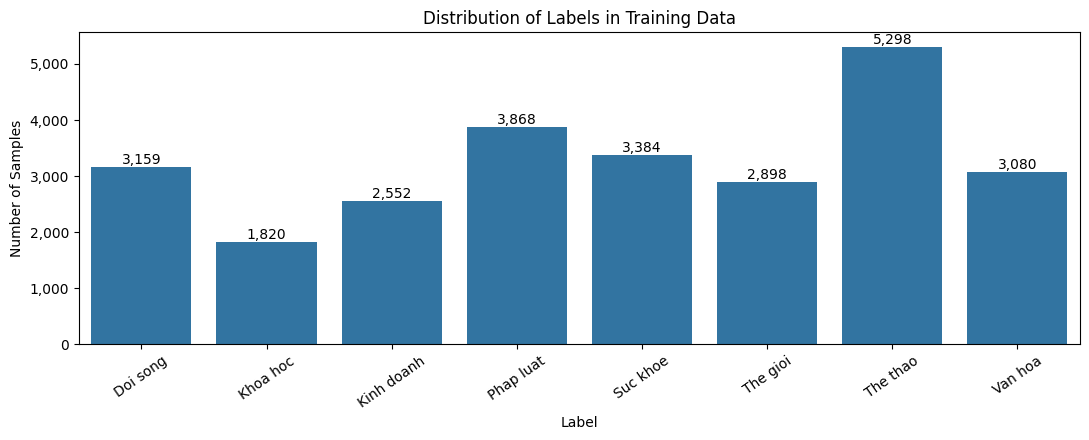

<Figure size 640x480 with 0 Axes>

In [11]:
os.makedirs("visualization", exist_ok=True)
plt.figure(figsize=(11, 4.5))
sns.countplot(x='label', data=train_df)#, order=label_counts.index)
plt.xticks(rotation=35)  # Rotate x-axis labels for better readability
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Labels in Training Data")

# Format y-axis ticks with commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, xytext=(0, 5),
                   textcoords='offset points')

plt.tight_layout()
plt.show()

plt.savefig('visualization/training_data_distribution.png', dpi=300)

In [12]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [13]:
len(train_df)

26059

## Word Tokenize in Training Dataset and Test Set

In [ ]:
train_df['content'] = [word_tokenize(el, format='text') for el in train_df['content']]
test_df['content'] = [word_tokenize(el, format='text') for el in test_df['content']]


## Save Converted Dataframes to CSV files

In [ ]:
os.makedirs("dataset", exist_ok=True)

train_df.to_csv("dataset/converted_train_dataset.csv", index=False)
test_df.to_csv("dataset/converted_test_dataset.csv", index=False)